# Import Data

In [1]:
%matplotlib inline
#%plotly_mimetype
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib import rcParams
import seaborn as sns

#plotly stuff
import plotly as py
import plotly.graph_objects as go # interactive
import ipywidgets as widgets
# import plotly.express as px

#setup offline mode
#py.offline.init_notebook_mode(connected=True)

# visual formatting
sns.set(
    style='white'
)

In [2]:
# expand visual returns
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 10000)

In [3]:
# import master DataFrame mdf
df = pd.read_csv('./data/03_mini_processing.csv', header=0, index_col=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158768 entries, 0 to 158767
Data columns (total 21 columns):
f_dir        158768 non-null object
m_id         158768 non-null object
m_date       158768 non-null object
m_from       158768 non-null object
m_to         155253 non-null object
m_cc         50373 non-null object
m_bcc        47978 non-null object
m_subj       152097 non-null object
mime_vers    158768 non-null float64
cont_type    158768 non-null object
encode       158768 non-null object
x_from       158768 non-null object
x_to         155892 non-null object
x_cc         48339 non-null object
x_bcc        117 non-null object
x_fold       158768 non-null object
x_orig       158768 non-null object
x_fname      156859 non-null object
m_body       158768 non-null object
name         158768 non-null object
gender       158768 non-null object
dtypes: float64(1), object(20)
memory usage: 25.4+ MB


In [5]:
# total email body chars (for process tracking)
start_chars = df.m_body.apply(len).sum()

print('Total Characters Across All Email Bodies in Corpus: {}.'.format(start_chars))

Total Characters Across All Email Bodies in Corpus: 112528801.


In [6]:
df.head(2)

,f_dir,m_id,m_date,m_from,m_to,m_cc,m_bcc,m_subj,mime_vers,cont_type,encode,x_from,x_to,x_cc,x_bcc,x_fold,x_orig,x_fname,m_body,name,gender
0,allen-p/_sent_mail/1,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,NaN,NaN,NaN,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Here is our forecast,phillip,boy
1,allen-p/_sent_mail/10,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,NaN,NaN,Re:,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...,phillip,boy


# Helper Functions

In [519]:
def two_var_timeline(a_df, title_string, print_data=False):
    
    # set the Locator, Formatter objects
    years = mdates.YearLocator() # every year
    months = mdates.MonthLocator() # every month
    years_fmt = mdates.DateFormatter('%Y') # format year
    months_fmt = mdates.DateFormatter('%b') # format year

    # create plot
    fig, ax = plt.subplots(figsize=(24, 6)) # create figure, 1 axes
    #gs = fig.add_gridspec(2, 2)

    ax.plot(p.index, p.iloc[:,0].values, color='#347DC1') # create barplot with c data
    ax.plot(p.index, p.iloc[:,1].values, color='#FF85A2') # create barplot with c data

    # format the ticks
    ax.xaxis.set_major_locator(years) # use Locator object to set major ticks
    ax.xaxis.set_minor_locator(months) # use Locator object to set minor ticks
    ax.xaxis.set_major_formatter(years_fmt) # format ticklabel strings with Formatter object
    ax.xaxis.set_minor_formatter(months_fmt) # 3-letter month name

    # format the coords message box
    ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
    ax.grid(True)
    #ax.legend(['boy','girl'])
    # axes labels
    ax.set_title(title_string) # title

In [550]:
def one_in_py_tmline(a_df, title_string, print_data=False, print_html=False):

    # set figure
    fig = go.Figure(
                    data = go.Scatter(
                                      x = a_df.index, 
                                      y = a_df.values, 
                                      mode='lines'
                    ))
    
    # layout
    fig.update_layout(
                      title=title_string, 
                      #yaxis_title='', 
                      xaxis_tickangle=315
                      )
    
    # output plot
    if print_html is True:
        fig.write_html('_figure.html', auto_open=True)
    else:
        fig.show()

In [8]:
def one_axis_bar(a_df, title_string, print_data=True):
    """Input: 
       - Indexed 1-category dataframe for bar plot
       - Title string
       
       Output: Formatted barh plot.
    
       Pass a DataFrame with axes to return
            a formatted standard barplot.
       
       Plot formatting includes:
       - Adjust colors to gender
       - Add grey gridline
       - Remove legend (color identifies category)
       - Remove left, bottom spine
       - Remove y axis label"""
    
    # sets color to blue, pink
    clrs = ['#347DC1', '#FF85A2']

    # plot
    a_df.plot(kind='barh', # selects the barh
        title=title_string, # sets the title to the input string
        color=clrs, # passes the colors above to plot
        legend=False, # removes legend
        grid='g', # set gridlines to grey
        ).invert_yaxis() # inverts plot on y axis 

    sns.despine(
        #left=True, 
        right=True, 
        top=True, 
        #bottom=True
    )
    
    # remove y axis label
    plt.xlabel('')
    plt.ylabel('')  
    
    if print_data is True:
        print(a_df)

In [9]:
def one_axis_barh(a_df, title_string, print_data=True):
    """Input: 
       - Indexed 2-category dataframe for comparison barh plot
       - Title string
       
       Output: Formatted barh plot
    
       Pass a DataFrame with two gender axes to return
            a formatted horizontal barplot with two comparison
            horizontal bars on each major index entry.
       
       Plot formatting includes:
       - Adjust colors to pink, blue
       - Flip y-axis so barh plot is correct orientation
       - Remove legend (color identifies category)"""
    
    # sets color to blue, pink
    clr = ['#36454f']

    # plot
    a_df.plot(kind='barh', # selects the barh
        title=title_string, # sets the title to the input string
        color=clr, # passes the colors above to plot
        legend=False, # removes legend
        grid='g', # set gridlines to grey
        ).invert_yaxis() # inverts plot on y axis 

    sns.despine(
        #left=True, 
        right=True, 
        top=True, 
        #bottom=True
    )
    
    # remove y axis label
    plt.xlabel('')
    plt.ylabel('')   

    if print_data is True:
        print(a_df)

In [10]:
def two_axes_barh(a_df, title_string, print_data=True):
    """Input: 
       - Indexed 2-category dataframe for comparison barh plot
       - Title string
       
       Output: Formatted barh plot
    
       Pass a DataFrame with two gender axes to return
            a formatted horizontal barplot with two comparison
            horizontal bars on each major index entry.
       
       Plot formatting includes:
       - Adjust colors to pink, blue
       - Flip y-axis so barh plot is correct orientation
       - Remove legend (color identifies category)"""
    
    # sets color to blue, pink
    clrs = ['#347DC1', '#FF85A2']

    # plot
    a_df.plot(kind='barh', # selects the barh
        title=title_string, # sets the title to the input string
        color=clrs, # passes the colors above to plot
        legend=False,  # removes legend
        grid='g', # set gridlines to grey
        ).invert_yaxis() # inverts plot on y axis 

    sns.despine(
        #left=True, 
        right=True, 
        top=True, 
        #bottom=True
    )
    
    # remove y axis label
    plt.xlabel('')
    plt.ylabel('')    
    
    if print_data is True:
        print(a_df)

## emails sent by gender

gender
boy     90037
girl    68731
dtype: int64


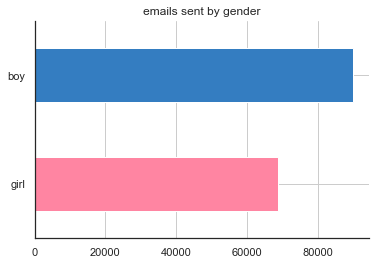

In [11]:
p = df.copy()
p = p.groupby(['gender']).size() # return size agg for gender

one_axis_bar(p, 'emails sent by gender')

## number of senders by gender

gender
boy     3277
girl    2594
dtype: int64


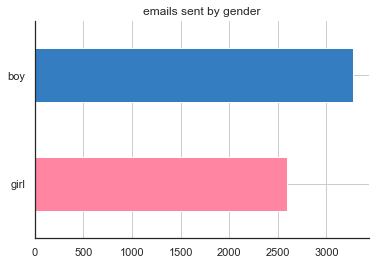

In [12]:
p = df.copy()
p = p.drop_duplicates('m_from').groupby(['gender']).size()

one_axis_bar(p, 'emails sent by gender')

## Create a DatetimeIndex

In [13]:
#df.groupby(['m_date']).size().plot(kind='bar', title='emails sent timeseries')
df.loc[:, 'm_date'].head()

0    Mon, 14 May 2001 16:39:00 -0700 (PDT)
1     Fri, 4 May 2001 13:51:00 -0700 (PDT)
2    Wed, 18 Oct 2000 03:00:00 -0700 (PDT)
3    Mon, 23 Oct 2000 06:13:00 -0700 (PDT)
4    Thu, 31 Aug 2000 05:07:00 -0700 (PDT)
Name: m_date, dtype: object

In [14]:
%%time

timf = df.copy() # copy initial df
timf = timf.reset_index() # reset index to retain starting index

# conversion
timf['m_date'] = pd.to_datetime(timf['m_date'], utc=True) # make series a datetime object, normalize it to utc
timf['m_date'] = pd.to_datetime(timf['m_date']).dt.tz_convert('US/Pacific') # convert timezone back to eastern time using .dt to identify a DatetimeIndex object

# set index
timf = timf.set_index(pd.DatetimeIndex(timf['m_date'])) # sets index to m_date as a DatetimeIndex

daylist = ['Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday'] # day list for Categorical dtype ordering 

# create weekday name column
timf['day_names'] = timf.index.day_name() # sets DatetimeIndex to weekday names; sets the series to categorically reference the list for sorting
timf['day_names'] = pd.Categorical(timf['day_names'], daylist, ordered=True) 

Wall time: 31.5 s


## emails sent each weekday

day_names
Sunday        3007
Monday       32120
Tuesday      33830
Wednesday    32375
Thursday     29855
Friday       25575
Saturday      1645
Name: 0, dtype: int64


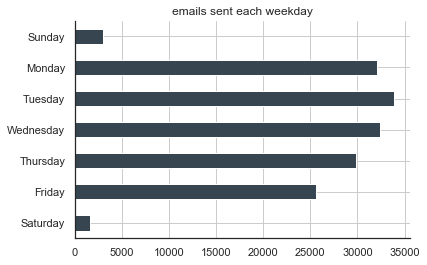

In [541]:
p = timf.loc['1998':].copy() # copy df
p = pd.DataFrame(p.groupby(['day_names']).size())[0].sort_index()  # groupby size, reindex

one_axis_barh(p, 'emails sent each weekday') # send to plotter

## emails sent each weekday by gender

gender       boy   girl
day_names              
Sunday      2209    798
Monday     18166  13954
Tuesday    18698  15132
Wednesday  18293  14082
Thursday   16878  12977
Friday     14292  11283
Saturday    1249    396


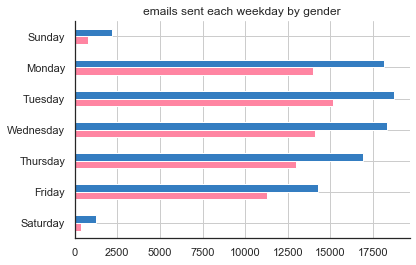

In [542]:
p = timf.loc['1998':].copy() # copy df
p = pd.DataFrame(p.groupby(['day_names', 'gender']).size()).unstack().reindex(labels=daylist)[0]

two_axes_barh(p, 'emails sent each weekday by gender')

## emails sent each weekday normalized by gender

gender          boy      girl
day_names                    
Sunday     0.024603  0.011629
Monday     0.202328  0.203346
Tuesday    0.208253  0.220512
Wednesday  0.203742  0.205211
Thursday   0.187982  0.189108
Friday     0.159180  0.164422
Saturday   0.013911  0.005771


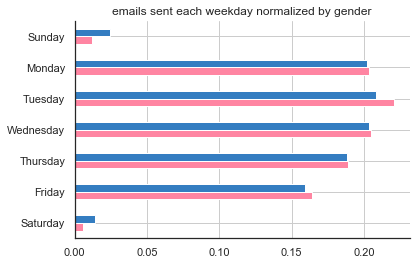

In [543]:
# correcting for 1979 date error
p = timf.loc['1998':].copy() # copy df
gender_totals = p[['gender']] # isolate gender for aggregate
gender_totals = gender_totals.groupby(['gender']).size().reset_index()

p = p.groupby(['day_names', 'gender']).size().reset_index() 
p = p.merge(gender_totals, how='left', on='gender')
p['normalized_gender'] = p['0_x'] / p['0_y'] # create new column of normalized gender counts
p = p.loc[:,['day_names', 'gender', 'normalized_gender']].set_index(['day_names', 'gender']).unstack('gender').normalized_gender # setup dataset 

two_axes_barh(p, 'emails sent each weekday normalized by gender')

## emails sent each day

In [551]:
p = timf.loc['1998':].resample('D').count().m_from.copy()

In [552]:
one_in_py_tmline(p, 'emails sent each day')

## emails sent each day by gender

In [521]:
# get relevant data
p = pd.DataFrame(timf.loc['1998':, 'gender'].copy())

# create 2nd column
p['girl'] = p['gender'].copy()
p.columns = ['boys', 'girls']

# quantify
p['boys'] = p.boys.apply(lambda x: 1 if x == 'boy' else 0)
p['girls'] = p.girls.apply(lambda x: 1 if x == 'girl' else 0)

# resample on day
p = p.resample('D').sum()

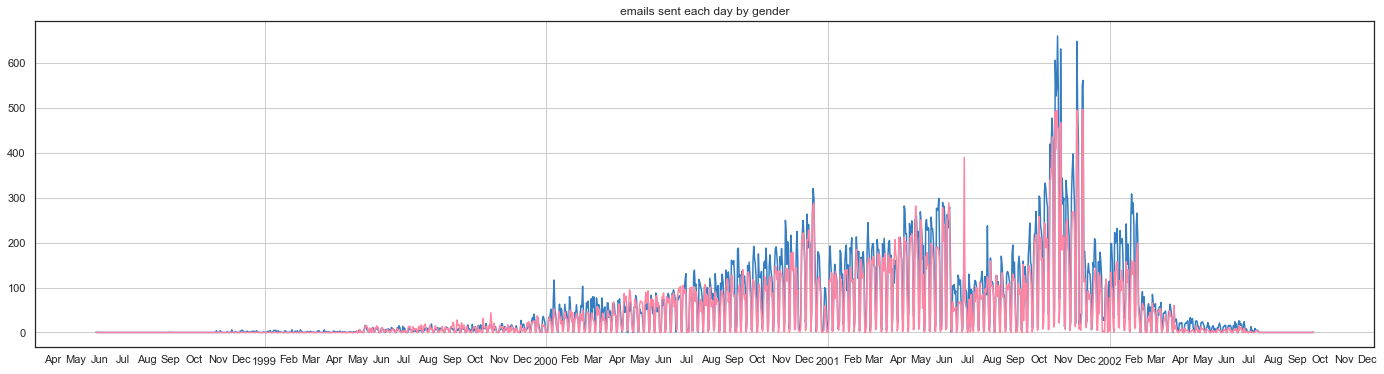

In [522]:
two_var_timeline(p, 'emails sent each day by gender')

## normalized emails sent each day by gender

In [547]:
# get relevant data
p = pd.DataFrame(timf.loc['1998':, 'gender'].copy())

# create 2nd column
p['girl'] = p['gender'].copy()
p.columns = ['boys', 'girls']

# quantify
p['boys'] = p.boys.apply(lambda x: 1 if x == 'boy' else 0)
p['girls'] = p.girls.apply(lambda x: 1 if x == 'girl' else 0)

# normalize
p = p.resample('D').sum()
p['boys'] = p.boys.apply(lambda x: x / p.boys.sum())
p['girls'] = p.girls.apply(lambda x: x / p.girls.sum())

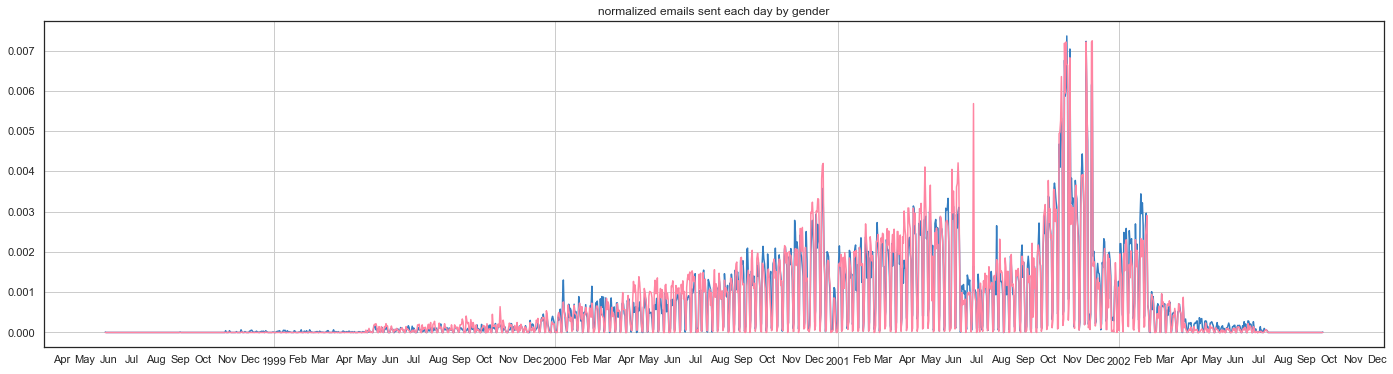

In [530]:
two_var_timeline(p, 'normalized emails sent each day by gender')

In [22]:
#        --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#        -------------------------------------------------------------------------------------    ¯\_(ツ)_/¯    -------------------------------------------------------------------------------------
#        ------------------------------------------------------------------------------------- DELETE ME PLEASE -------------------------------------------------------------------------------------
#        -------------------------------------------------------------------------------------    ¯\_(ツ)_/¯    -------------------------------------------------------------------------------------
#        --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------